In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = pd.read_excel('Cell-Cycle-Set.xlsx')
data = data.dropna()

data.head()

,Gene_Name,mean_RNA_G1,mean_RNA_S,mean_RNA_G2,mean_protein_G1,mean_protein_S,mean_protein_G2,GOBP,GOMF,GOCC
1,RBM47,10.330107,10.396423,10.677257,24.748020,22.426777,24.651200,base conversion or substitution editing;biolog...,binding;nucleic acid binding;nucleotide bindin...,apolipoprotein B mRNA editing enzyme complex;c...
2,ADAM9,12.321340,12.203630,12.233293,19.083593,16.248873,19.281277,activation of MAPKK activity;activation of pro...,binding;catalytic activity;cation binding;coll...,cell part;extracellular region part;extracellu...
3,UBA6,10.827333,10.758463,10.685847,24.614467,21.356450,25.207883,catabolic process;cellular catabolic process;c...,adenyl nucleotide binding;adenyl ribonucleotid...,cell part;cytoplasm;intracellular part
5,SHTN1,10.845517,10.824347,10.634980,26.112690,22.905927,26.138843,axon guidance;chemotaxis;locomotion;response t...,binding;enzyme binding;kinase binding;protein ...,axon;cell part;cell projection;neuron projection
6,SIL1,9.042438,8.924093,9.035878,22.750520,20.598227,23.093443,cellular macromolecule metabolic process;cellu...,binding;protein binding;unfolded protein binding,cell part;cytoplasmic part;endoplasmic reticul...


#### Task 1
It is straightforward to see from the above that the protein concentration is higher than the RNA at each stage. this may be because the single mRNA strand used by the ribosome can be used to create the same protein multiple times.


Text(0.5, 0, 'Mean G2 Expression')

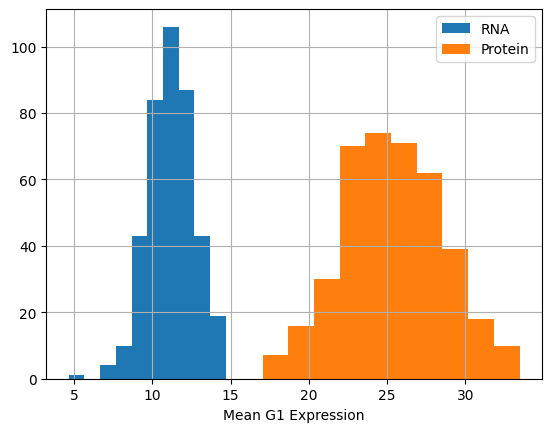

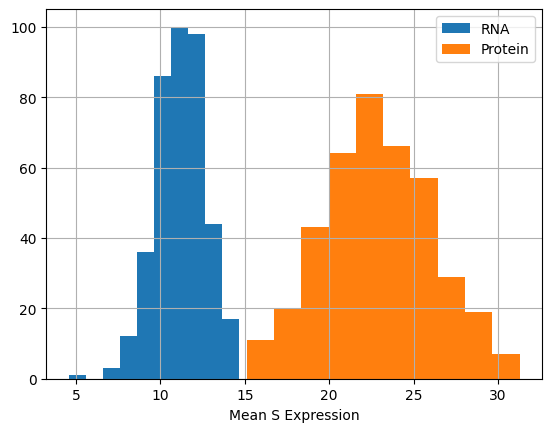

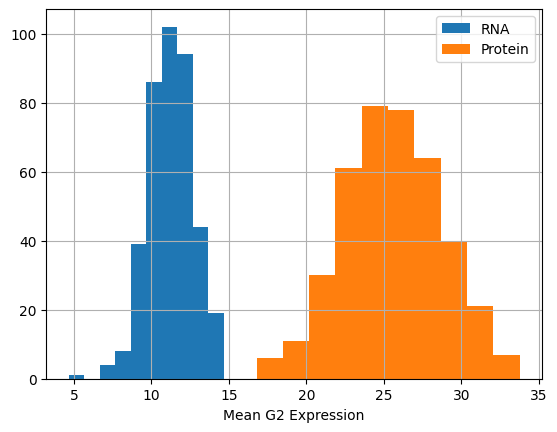

In [42]:
fig1, ax1 = plt.subplots()

#.hist draws histogram on a pandas series using matplotlib
#default bin size is 10
data.mean_RNA_G1.hist(ax=ax1, label='RNA', bins = 10)
data.mean_protein_G1.hist(ax=ax1, label='Protein', bins = 10)

#puts a colour coded legend of what each data set is
ax1.legend()

#set the label of the x axis
ax1.set_xlabel('Mean G1 Expression')

fig2, ax2 = plt.subplots()
data.mean_RNA_S.hist(ax=ax2, label='RNA')
data.mean_protein_S.hist(ax=ax2, label='Protein')
ax2.legend()
ax2.set_xlabel('Mean S Expression')

fig3, ax3 = plt.subplots()
data.mean_RNA_G2.hist(ax=ax3, label='RNA')
data.mean_protein_G2.hist(ax=ax3, label='Protein')
ax3.legend()
ax3.set_xlabel('Mean G2 Expression')

#### Task2
We can observe that there is only a maximum difference of 0.01 in the Spearman's rank score between any two phases in the pairwise correlation between RNA and protein concentration, indicating that the change in timestep has little impact on the relationship between the concentrations of RNA and protein.

In [63]:

print("G1 correlation:", "%f" % data.mean_RNA_G1.corr(data.mean_protein_G1, method = "spearman"))
print("S correlation:", "%f" % data.mean_RNA_S.corr(data.mean_protein_S, method = "spearman"))
print("G2 correlation:", "%f" % data.mean_RNA_G2.corr(data.mean_protein_G2, method = "spearman"))

G1 correlation: 0.513322
S correlation: 0.522750
G2 correlation: 0.525914


#### Task3
The coefficient of determination score is not high, but this is to be expected as a score close to 1 would indicate a high degree of correlation and mean that the data is a nearly perfect straight line shape, which is not the case as they are quite scattered around the "best fit line."

From a visual perspective, looking at the data above, we can see that most of the RNA concentration values less than 8 are outliers and do not represent the general distribution of the data, perhaps "skewing" our "best fit line," so let's see if filtering out these data points can improve our coefficient of determination score.

By removing outliers, we can see that our prediction of protein concentration is now slightly more correlated with the actual reference values.

However, as stated earlier, the correlation between predicted values and actual values is still not strong enough to use a linear model alone to accurately predict protein concentration from RNA concentration.

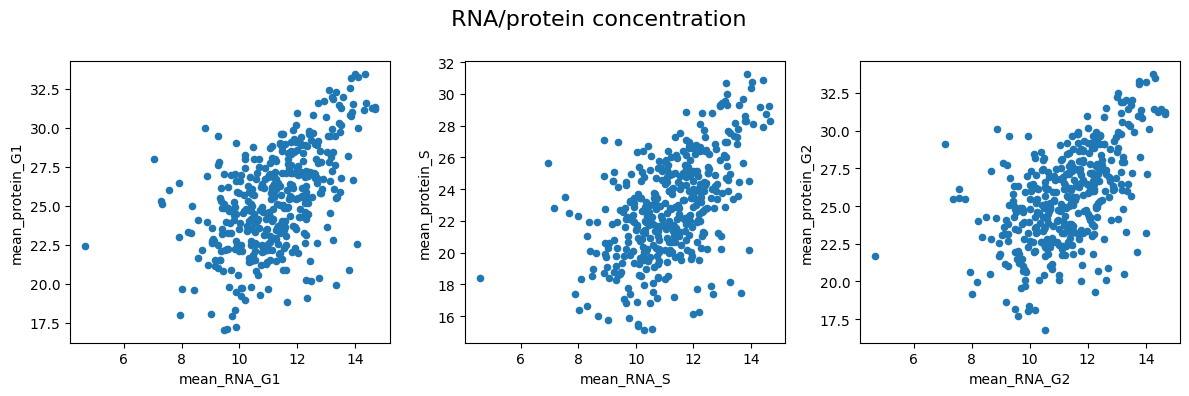

In [64]:
multiFig, multiAx = plt.subplots (ncols = 3, figsize= (12, 4))

data.plot.scatter("mean_RNA_G1", "mean_protein_G1", ax = multiAx[0])
data.plot.scatter("mean_RNA_S", "mean_protein_S", ax = multiAx[1])
data.plot.scatter("mean_RNA_G2", "mean_protein_G2", ax = multiAx[2])

#make the plots spaced apart
multiFig.tight_layout()

multiFig.suptitle(" RNA/protein concentration", fontsize = 16)

#Make the title not overlapping
multiFig.subplots_adjust(top=0.85)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
data.mean_RNA_G1

1      10.330107
2      12.321340
3      10.827333
5      10.845517
6       9.042438
         ...    
494    11.115773
495    11.251870
496    13.013263
497     9.048456
498    13.525467
Name: mean_RNA_G1, Length: 397, dtype: float64

In [47]:
def data_process(col):
    return col.to_numpy().reshape(-1,1)

G1 score: 0.2731711059314553


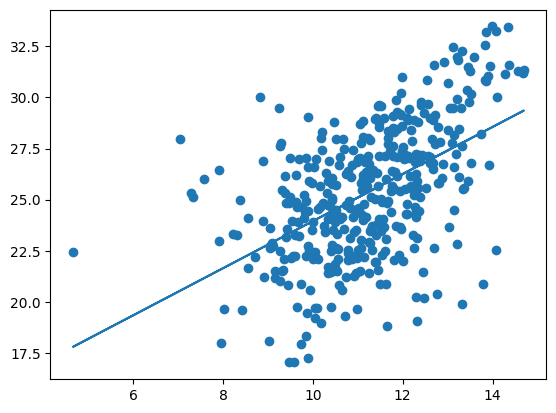

In [48]:
g1_rna = data_process(data.mean_RNA_G1)
g1_protein = data_process(data.mean_protein_G1)
g1_model = LinearRegression().fit(g1_rna, g1_protein)
g1_prediction = g1_model.predict(g1_rna)
plt.scatter(g1_rna, g1_protein)
plt.plot(g1_rna, g1_prediction)
g1_score = g1_model.score(g1_rna, g1_protein)
print("G1 score:", g1_score)

S score: 0.28750000422102284


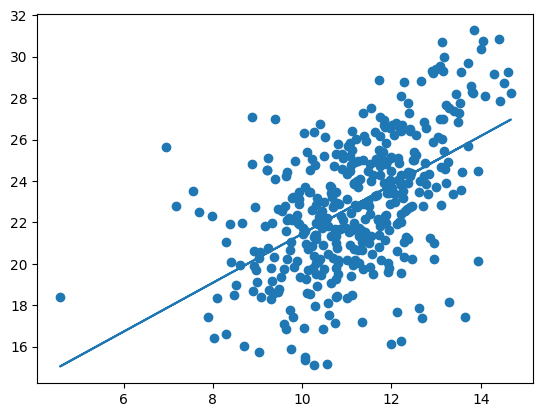

In [49]:
s_rna = data_process(data.mean_RNA_S)
s_protein = data_process(data.mean_protein_S)
s_model = LinearRegression().fit(s_rna, s_protein)
s_prediction = s_model.predict(s_rna)
plt.scatter(s_rna, s_protein)
plt.plot(s_rna, s_prediction)
s_score = s_model.score(s_rna, s_protein)
print("S score:", s_score)

G2 score: 0.28362549895654476


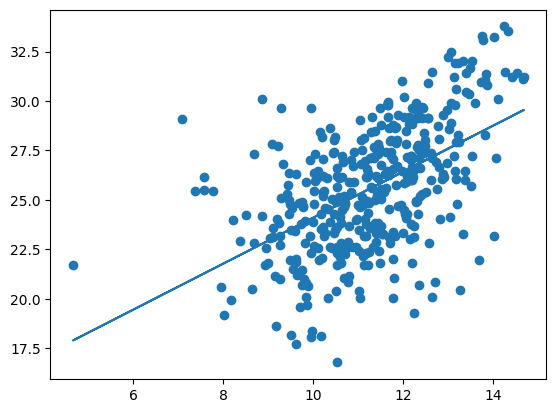

In [50]:
g2_rna = data_process(data.mean_RNA_G2)
g2_protein = data_process(data.mean_protein_G2)
g2_model = LinearRegression().fit(g2_rna, g2_protein)
g2_prediction = g2_model.predict(g2_rna)
plt.scatter(g2_rna, g2_protein)
plt.plot(g2_rna, g2_prediction)
g2_score = g2_model.score(g2_rna, g2_protein)
print("G2 score:", g2_score)

In [51]:
g1_filtered = data[data.mean_RNA_G1 > 8]
s_filtered = data[data.mean_RNA_S > 8]
g2_filtered = data[data.mean_RNA_G2 > 8]

In [52]:
G1_rna, G1_protein = data_process(g1_filtered.mean_RNA_G1), data_process(g1_filtered.mean_protein_G1)
G1_model = LinearRegression().fit(G1_rna, G1_protein)
G1_protein_predictions = G1_model.predict(G1_rna)
print("G1 filtered score:", r2_score(G1_protein, G1_protein_predictions))
print("G1 original score:", g1_score)

G1 filtered score: 0.3089380822670228
G1 original score: 0.2731711059314553


In [53]:
S_rna, S_protein = data_process(s_filtered.mean_RNA_S), data_process(s_filtered.mean_protein_S)
S_model = LinearRegression().fit(S_rna, S_protein)

S_protein_predictions = S_model.predict(S_rna)
print("S filtered score:",r2_score(S_protein, S_protein_predictions))
print("S original score:", s_score)

S filtered score: 0.318061690581281
S original score: 0.28750000422102284


In [54]:
G2_rna, G2_protein = data_process(g2_filtered.mean_RNA_G2), data_process(g2_filtered.mean_protein_G2)
G2_model = LinearRegression().fit(G2_rna, G2_protein)

G2_protein_predictions = G2_model.predict(G2_rna)
print("G2 filtered score:",r2_score(G2_protein, G2_protein_predictions))
print("G2 original score:", g2_score)

G2 filtered score: 0.32148617805391766
G2 original score: 0.28362549895654476


### Week2

#### task1
Correlations are weaker in datasets that only include genes that contain the "cell cycle" string in the GOBP field.

71


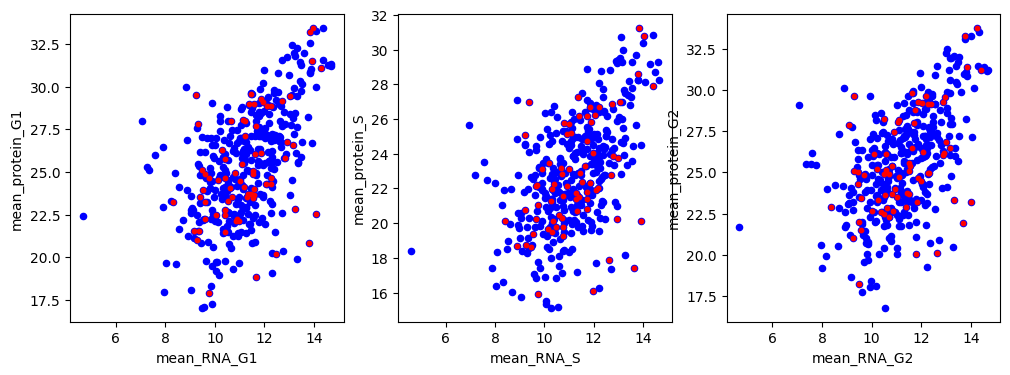

In [55]:
gobp = data[data.GOBP.str.contains('cell cycle')]
fig4,ax4 = plt.subplots(ncols=3, figsize=(12,4))
data.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax4[0], color='b')
ax4[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='r', s=10.)
data.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax4[1], color='b')
ax4[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='r', s=10.)
data.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax4[2], color='b')
ax4[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='r', s=10.)
print(len(gobp))

In [56]:
print("G1 unfiltered data correlation:", "%0.3f" % data.mean_RNA_G1.corr(data.mean_protein_G1, method = "spearman"))
print("S unfiltered data correlation:", "%0.3f" % data.mean_RNA_S.corr(data.mean_protein_S, method = "spearman"))
print("G2 unfiltered data correlation:", "%0.3f" % data.mean_RNA_G2.corr(data.mean_protein_G2, method = "spearman"))

G1 unfiltered data correlation: 0.513
S unfiltered data correlation: 0.523
G2 unfiltered data correlation: 0.526


In [57]:
print("cell cycle GOBP G1 data correlation:", "%0.3f" % gobp.mean_RNA_G1.corr(gobp.mean_protein_G1, method = "spearman"))
print("cell cycle GOBP S data correlation:", "%0.3f" % gobp.mean_RNA_S.corr(gobp.mean_protein_S, method = "spearman"))
print("cell cycle GOBP G2 data correlation:", "%0.3f" % gobp.mean_RNA_G2.corr(gobp.mean_protein_G2, method = "spearman"))

cell cycle GOBP G1 data correlation: 0.393
cell cycle GOBP S data correlation: 0.420
cell cycle GOBP G2 data correlation: 0.403


#### task2
It can be observed that compared to the raw, unfiltered data and the data instances that only contain the "cell cycle", the data instances that only contain the substring "nucleus" in their GOCC term exhibit a higher degree of positive correlation between protein and RNA concentrations. This is reasonable, as the GOCC value of "nucleus" indicates that the location where the concentration data was recorded is in proximity to the nucleus, and logically, there would be a greater presence of RNA around the nucleus due to the fact that a substantial amount of RNA is transported to the nucleus to synthesize proteins, as well as RNA that constitutes the actual nucleus. The higher correlation suggests that the level of RNA concentration in this area is generally higher than in other data previously recorded in the notebook, which can be attributed to the lower correlation in the other data and the general observation that RNA concentrations are lower than protein concentrations, meaning an increase in RNA concentration would result in a rise in the correlation.

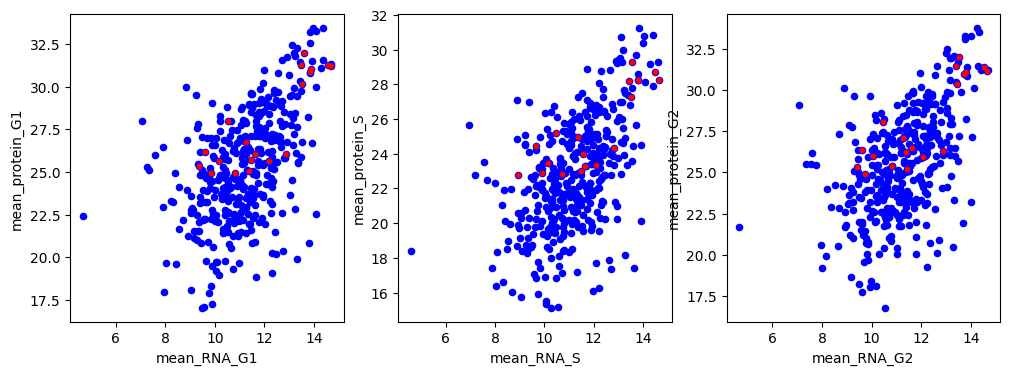

In [58]:
gocc = data[data.GOCC.str.contains('ribosome')]
fig5,ax5 = plt.subplots(ncols=3, figsize=(12,4))
data.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax5[0], color='b')
ax5[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='r', s=10.)
data.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax5[1], color='b')
ax5[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='r', s=10.)
data.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax5[2], color='b')
ax5[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='r', s=10.)

In [59]:
print("ribosome GOCC G1 data correlation:", "%0.3f" % gocc.mean_RNA_G1.corr(gocc.mean_protein_G1, method = "spearman"))
print("ribosome GOCC S data correlation:", "%0.3f" % gocc.mean_RNA_S.corr(gocc.mean_protein_S, method = "spearman"))
print("ribosome GOCC G2 data correlation:", "%0.3f" % gocc.mean_RNA_G2.corr(gocc.mean_protein_G2, method = "spearman"))
print("g1 unfiltered data correlation:", "%0.3f" % data.mean_RNA_G1.corr(data.mean_protein_G1, method = "spearman"))
print("s unfiltered data correlation:", "%0.3f" % data.mean_RNA_S.corr(data.mean_protein_S, method = "spearman"))
print("g2 unfiltered data correlation:", "%0.3f" % data.mean_RNA_G2.corr(data.mean_protein_G2, method = "spearman"))

ribosome GOCC G1 data correlation: 0.732
ribosome GOCC S data correlation: 0.770
ribosome GOCC G2 data correlation: 0.744
g1 unfiltered data correlation: 0.513
s unfiltered data correlation: 0.523
g2 unfiltered data correlation: 0.526


#### task3
Some terms can be complex and difficult to understand, especially for researchers who are not experts in the field.
One difficulty that arises when using these terms is that some of them can be quite similar, such as "cell process," "metabolic process," and "cell metabolic process," which can make it challenging to differentiate between them.

In [60]:
print(data.GOBP.str.split(';',expand=True).stack().value_counts()[:50])

cellular process                                                   377
metabolic process                                                  273
cellular metabolic process                                         260
primary metabolic process                                          255
biological regulation                                              236
regulation of biological process                                   225
macromolecule metabolic process                                    211
regulation of cellular process                                     211
cellular macromolecule metabolic process                           201
nitrogen compound metabolic process                                167
cellular nitrogen compound metabolic process                       166
nucleobase-containing compound metabolic process                   158
response to stimulus                                               148
cellular component organization or biogenesis                      145
nuclei

#### task4
From the graph, it is observed that the set of data points with the "ribosome" label in the GOBP field show minimal variations in the protein or RNA concentration throughout the three phases. This can be attributed to the fact that proteins are essential for performing a vast majority of cellular tasks, hence ribosomes must continuously produce new proteins regardless of the stage of the cell cycle. Additionally, ribosomes require a constant supply of mRNA strands for protein synthesis, leading to a minimal change in the RNA concentration.

Text(0.5, 0.98, 'Standardized G2/G1')

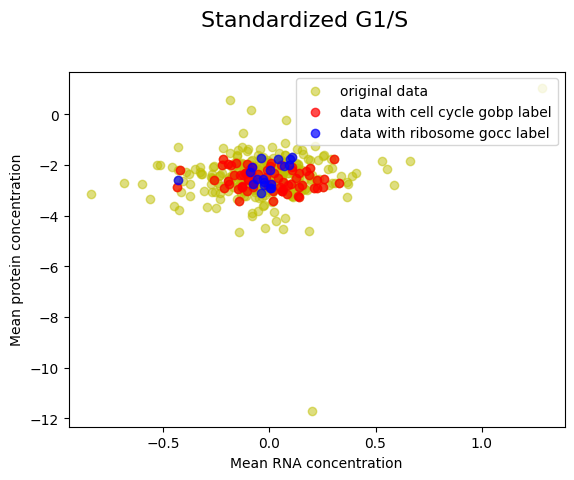

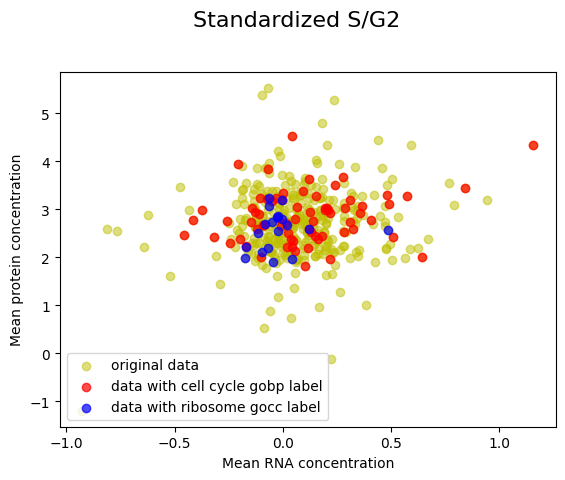

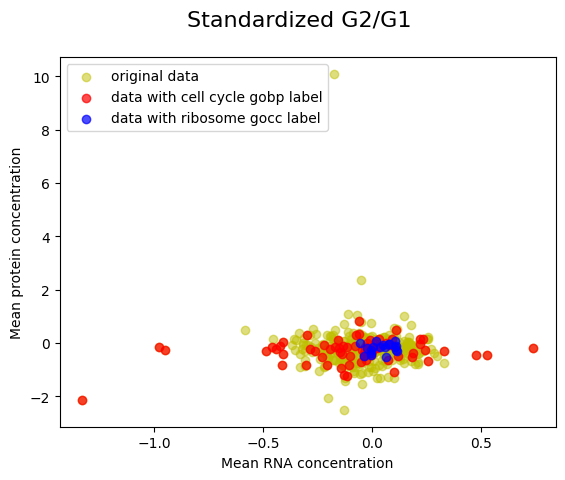

In [62]:
data['mean_RNA_g1_s'] = (data.mean_RNA_S - data.mean_RNA_G1)
data['mean_RNA_s_g2'] = (data.mean_RNA_G2 - data.mean_RNA_S)
data['mean_RNA_g2_g1'] = (data.mean_RNA_G1 - data.mean_RNA_G2)
data['mean_protein_g1_s'] = (data.mean_protein_S - data.mean_protein_G1)
data['mean_protein_s_g2'] = (data.mean_protein_G2 - data.mean_protein_S)
data['mean_protein_g2_g1'] = (data.mean_protein_G1 - data.mean_protein_G2)

data.iloc[:,16:] = (data.iloc[:,-6:] - data.iloc[:,-6:].mean())/data.iloc[:,-6:].std(axis=0)

gobp = data[data.GOBP.str.contains('cell cycle')]
gocc = data[data.GOCC.str.contains('ribosome')]

g1_s_plot, g1_s_ax = plt.subplots()
g1_s_ax.scatter(data.mean_RNA_g1_s, data.mean_protein_g1_s, color = 'y', alpha = 0.5, label = "original data")
g1_s_ax.scatter(gobp.mean_RNA_g1_s, gobp.mean_protein_g1_s, color = 'r', alpha = 0.7, label = "data with cell cycle gobp label")
g1_s_ax.scatter(gocc.mean_RNA_g1_s, gocc.mean_protein_g1_s, color = 'b', alpha = 0.7, label = "data with ribosome gocc label")
g1_s_ax.legend()
g1_s_ax.set_xlabel("Mean RNA concentration")
g1_s_ax.set_ylabel("Mean protein concentration")

g1_s_plot.suptitle("Standardized G1/S ", fontsize = 16)
g1_s_plot.subplots_adjust(top=0.85)

s_g2_plot, s_g2_ax = plt.subplots()
s_g2_ax.scatter(data.mean_RNA_s_g2, data.mean_protein_s_g2, color = 'y', alpha = 0.5, label = "original data")
s_g2_ax.scatter(gobp.mean_RNA_s_g2, gobp.mean_protein_s_g2, color = 'r', alpha = 0.7, label = "data with cell cycle gobp label")
s_g2_ax.scatter(gocc.mean_RNA_s_g2, gocc.mean_protein_s_g2, color = 'b', alpha = 0.7, label = "data with ribosome gocc label")
s_g2_ax.legend()
s_g2_ax.set_xlabel("Mean RNA concentration")
s_g2_ax.set_ylabel("Mean protein concentration")
s_g2_plot.suptitle("Standardized S/G2 ", fontsize = 16)
s_g2_plot.subplots_adjust(top=0.85)

g2_g1_plot, g2_g1_ax = plt.subplots()
g2_g1_ax.scatter(data.mean_RNA_g2_g1, data.mean_protein_g2_g1, color = 'y', alpha = 0.5, label = "original data")
g2_g1_ax.scatter(gobp.mean_RNA_g2_g1, gobp.mean_protein_g2_g1, color = 'r', alpha = 0.7, label = "data with cell cycle gobp label")
g2_g1_ax.scatter(gocc.mean_RNA_g2_g1, gocc.mean_protein_g2_g1, color = 'b', alpha = 0.7, label = "data with ribosome gocc label")
g2_g1_ax.legend()
g2_g1_ax.set_xlabel("Mean RNA concentration")
g2_g1_ax.set_ylabel("Mean protein concentration")

g2_g1_plot.suptitle("Standardized G2/G1", fontsize = 16)
